In [1]:
import numpy as np 
import matplotlib.pyplot as plt

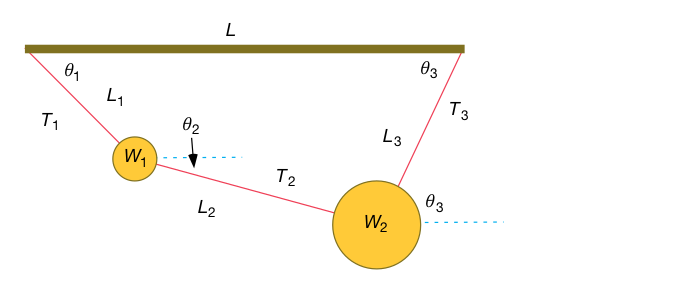

Task: Given weights $(W_1, W_2)$ and lengths $(L_1, L_2, L_3)$, find the angles assumed by the strings and determine the tensions exerted by them. 

To solve this problem, we will apply Newton's first law and combine it with the constraints of the physical geometry of the system to derive a system of equations we can attempt to solve for the configuration of the system. 

**Geometric Constraints** 
\begin{align}
    &L_1\cos\theta_1 + L_2\cos\theta_2 + L_3\cos\theta_3 = L \\
    &L_1\sin\theta_1 + L_2\sin\theta_2 + L_3\sin\theta_3 = 0 \\ 
    &sin^2\theta_1+\cos^2\theta_1 = 1 \\
    &sin^2\theta_2+\cos^2\theta_2 = 1 \\
    &sin^2\theta_3+\cos^2\theta_3 = 1 
\end{align}

**Physics (Newton's 1st)**
\begin{align}
    &T_1\sin\theta_1-T_2\sin\theta_2-W_1 = 0 \\ 
    &T_1\cos\theta_1-T_2\cos\theta_2 = 0 \\ 
    &T_2\sin\theta_2 + T_3\sin\theta_3 - W_2 = 0\\
    &T_2\cos\theta_2 - T_3\cos\theta_3 = 0
\end{align}

Considering that Linear Algebra is a great tool for solving *linear equations*, we note that if we consider $\sin\theta_i$ and $\cos\theta_i$ as independent variables, then we can attempt to formulate our equations into a linear system, i.e. if we take
\begin{equation}
    \vec{x} = \begin{pmatrix}
        \sin\theta_1 \\ 
        \sin\theta_2 \\ 
        \sin\theta_3 \\ 
        \cos\theta_1 \\
        \cos\theta_2 \\ 
        \cos\theta_3 \\ 
        T_1 \\ 
        T_2 \\ 
        T_3 
    \end{pmatrix}
\end{equation}
Then, we have the system 
\begin{equation}
    f(\vec{x}) = \vec{0}
\end{equation}

Unfortunately, a few of the equations are nonlinear as they involve combinations of angles *and* tensions. To deal with this, we can guess an approximate solution $\{x_i\}$ such that there exists a set of corrections $\{\Delta x_i\}$ which allow us to satisfy the system, i.e.
\begin{equation}
    f\left(\vec{x}+\vec{\Delta x}\right) = \vec{0}
\end{equation}
or in terms of the $i^{th}$ equation, 
\begin{equation}
    f_i(x_1+\Delta x_1, x_2+\Delta x_2, \dots, x_9 + \Delta x_9) = 0
\end{equation}

If the initial guess is good enough then the corrections are only a small perturbation and can be solved by using the multivariable Taylor series expansion to $f_i$: 
\begin{equation}
    f_i(x_1+\Delta x_1, \dots, x_9+\Delta x_9) \approx f_i(x_1,\dots,x_9) + \sum_{j=1}^{9}\frac{\partial f_i}{\partial x_j}\Delta x_j = 0
\end{equation}

The partial derivatives form a matrix and thus, we now have a linear system given by 
\begin{equation}
    \vec{f}+F'\vec{\Delta x} = \vec{0}
\end{equation}
which for a given set of $x_i's$ leads to the correction vector given by 
\begin{equation}
    \vec{\Delta x} = -F'^{-1}\vec{f}
\end{equation}

to save further time, we can use an approximation for the partial derivatives using a finite difference scheme, e.g.
\begin{equation}
    \frac{\partial f_i}{\partial x_j} \approx \frac{f_i(x_j+\delta x_j) - f_i(x_j)}{\delta x_j}
\end{equation}

Since all that matters is that we *move towards the correct solution*, the fact that this is not the analytic form for the deriviative does not matter

# Numpy's linalg package

To solve general matrix equations formulated in python, we can use Numpy! For example, the standard matrix equation 
\begin{equation}
    A\vec{x} = \vec{b}
\end{equation}
can be solved as follows: 

In [6]:
from numpy.linalg import * 


A = np.array([[1, 2, 3], [22, 32, 42], [55, 66, 100]])
print('A=', A) 

b = np.array([1, 2, 3])
print('b=', b)



A= [[  1   2   3]
 [ 22  32  42]
 [ 55  66 100]]
b= [1 2 3]


In [15]:
x = solve(A, b)
print('x = ', x)

print('Residual =', np.dot(A, x)-b)

x =  [-1.4057971  -0.1884058   0.92753623]
Residual = [2.22044605e-16 0.00000000e+00 0.00000000e+00]


In [16]:
# We can also solve the same equation by computing the inverse to A

print(np.dot(A, inv(A)))

print('x =', np.dot(inv(A), b))

[[ 1.00000000e+00 -2.77555756e-17 -1.38777878e-17]
 [-4.44089210e-15  1.00000000e+00 -3.05311332e-16]
 [-1.77635684e-15  3.33066907e-16  1.00000000e+00]]
x = [-1.4057971  -0.1884058   0.92753623]


The next type of equation to solve is an eigenvalue equation. For example: the principle axes for a cube are the solutions to an eigenvalue equation of the form 
\begin{equation}
I\vec{\omega} = \lambda\omega 
\end{equation}


In [22]:
I = np.array([[2/3, -1/4],[-1/4, 4/3]])
print('I=\n', I)

eig_vals, eig_vecs = eig(I) 
print('Eigenvalues: ', eig_vals)
print('Eigenvectors: ', eig_vecs)

I=
 [[ 0.66666667 -0.25      ]
 [-0.25        1.33333333]]
Eigenvalues:  [0.58333333 1.41666667]
Eigenvectors:  [[-0.9486833   0.31622777]
 [-0.31622777 -0.9486833 ]]
